## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.261494  0.133641  0.124271 -0.302541 -1.700864 -0.452772
1  0.362696 -1.617280  0.029202  0.243579 -0.496390 -1.475719
2  1.617648  1.552993 -0.688113 -0.402179  1.478524 -0.536190
3 -0.863819 -0.385800  1.006706 -0.227992  0.315764 -0.615063
4  0.965558 -0.499295 -0.949171  1.569146  0.959979  1.572930


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9801501	total: 46.8ms	remaining: 46.8s
1:	learn: 0.9700320	total: 47.2ms	remaining: 23.6s
2:	learn: 0.9600313	total: 47.6ms	remaining: 15.8s
3:	learn: 0.9483400	total: 47.8ms	remaining: 11.9s
4:	learn: 0.9385301	total: 48.2ms	remaining: 9.6s
5:	learn: 0.9299708	total: 48.6ms	remaining: 8.05s
6:	learn: 0.9193438	total: 49ms	remaining: 6.95s
7:	learn: 0.9094485	total: 49.4ms	remaining: 6.13s
8:	learn: 0.8985182	total: 49.8ms	remaining: 5.48s
9:	learn: 0.8879009	total: 50.2ms	remaining: 4.96s
10:	learn: 0.8780033	total: 50.5ms	remaining: 4.54s
11:	learn: 0.8681746	total: 50.9ms	remaining: 4.19s
12:	learn: 0.8584292	total: 51.3ms	remaining: 3.89s
13:	learn: 0.8502550	total: 51.7ms	remaining: 3.64s
14:	learn: 0.8422508	total: 52.1ms	remaining: 3.42s
15:	learn: 0.8333207	total: 52.5ms	remaining: 3.23s
16:	learn: 0.8243976	total: 52.9ms	remaining: 3.06s
17:	learn: 0.8164322	total: 53.3ms	remaining: 2.91s
18:	learn: 0.8065212	total: 53.7ms	remaining: 2

174:	learn: 0.2127199	total: 111ms	remaining: 524ms
175:	learn: 0.2112314	total: 112ms	remaining: 522ms
176:	learn: 0.2098464	total: 112ms	remaining: 521ms
177:	learn: 0.2084180	total: 112ms	remaining: 519ms
178:	learn: 0.2068816	total: 113ms	remaining: 517ms
179:	learn: 0.2051890	total: 113ms	remaining: 515ms
180:	learn: 0.2033229	total: 113ms	remaining: 513ms
181:	learn: 0.2019868	total: 114ms	remaining: 512ms
182:	learn: 0.2004474	total: 114ms	remaining: 510ms
183:	learn: 0.1991107	total: 115ms	remaining: 508ms
184:	learn: 0.1978385	total: 115ms	remaining: 506ms
185:	learn: 0.1962830	total: 115ms	remaining: 504ms
186:	learn: 0.1948807	total: 116ms	remaining: 503ms
187:	learn: 0.1931757	total: 116ms	remaining: 501ms
188:	learn: 0.1912884	total: 116ms	remaining: 499ms
189:	learn: 0.1901354	total: 117ms	remaining: 497ms
190:	learn: 0.1887147	total: 117ms	remaining: 495ms
191:	learn: 0.1876402	total: 117ms	remaining: 494ms
192:	learn: 0.1863003	total: 118ms	remaining: 492ms
193:	learn: 

438:	learn: 0.0417540	total: 208ms	remaining: 266ms
439:	learn: 0.0414852	total: 209ms	remaining: 266ms
440:	learn: 0.0412252	total: 209ms	remaining: 265ms
441:	learn: 0.0410003	total: 210ms	remaining: 265ms
442:	learn: 0.0407931	total: 210ms	remaining: 264ms
443:	learn: 0.0405319	total: 210ms	remaining: 263ms
444:	learn: 0.0403293	total: 211ms	remaining: 263ms
445:	learn: 0.0400746	total: 211ms	remaining: 262ms
446:	learn: 0.0398254	total: 212ms	remaining: 262ms
447:	learn: 0.0395912	total: 212ms	remaining: 261ms
448:	learn: 0.0393636	total: 212ms	remaining: 261ms
449:	learn: 0.0391424	total: 213ms	remaining: 260ms
450:	learn: 0.0388998	total: 213ms	remaining: 259ms
451:	learn: 0.0387066	total: 213ms	remaining: 259ms
452:	learn: 0.0386051	total: 214ms	remaining: 258ms
453:	learn: 0.0385384	total: 214ms	remaining: 257ms
454:	learn: 0.0383518	total: 214ms	remaining: 257ms
455:	learn: 0.0382870	total: 215ms	remaining: 256ms
456:	learn: 0.0382352	total: 215ms	remaining: 256ms
457:	learn: 

709:	learn: 0.0134675	total: 307ms	remaining: 125ms
710:	learn: 0.0134072	total: 307ms	remaining: 125ms
711:	learn: 0.0133382	total: 308ms	remaining: 124ms
712:	learn: 0.0132608	total: 308ms	remaining: 124ms
713:	learn: 0.0132477	total: 308ms	remaining: 124ms
714:	learn: 0.0131838	total: 309ms	remaining: 123ms
715:	learn: 0.0131529	total: 309ms	remaining: 123ms
716:	learn: 0.0131331	total: 310ms	remaining: 122ms
717:	learn: 0.0131186	total: 310ms	remaining: 122ms
718:	learn: 0.0130995	total: 310ms	remaining: 121ms
719:	learn: 0.0130561	total: 311ms	remaining: 121ms
720:	learn: 0.0129989	total: 311ms	remaining: 120ms
721:	learn: 0.0129792	total: 311ms	remaining: 120ms
722:	learn: 0.0129127	total: 312ms	remaining: 119ms
723:	learn: 0.0128507	total: 312ms	remaining: 119ms
724:	learn: 0.0128388	total: 312ms	remaining: 119ms
725:	learn: 0.0128099	total: 313ms	remaining: 118ms
726:	learn: 0.0127962	total: 313ms	remaining: 118ms
727:	learn: 0.0127231	total: 314ms	remaining: 117ms
728:	learn: 

993:	learn: 0.0052921	total: 408ms	remaining: 2.46ms
994:	learn: 0.0052792	total: 408ms	remaining: 2.05ms
995:	learn: 0.0052712	total: 409ms	remaining: 1.64ms
996:	learn: 0.0052474	total: 409ms	remaining: 1.23ms
997:	learn: 0.0052259	total: 410ms	remaining: 820us
998:	learn: 0.0052179	total: 410ms	remaining: 410us
999:	learn: 0.0051969	total: 410ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

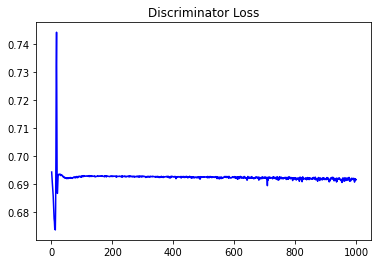

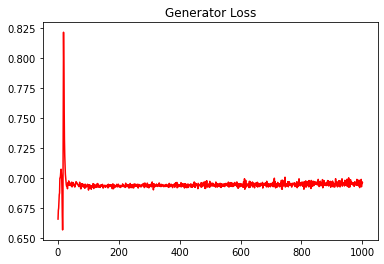

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09972564650520536


#### Sanity Checks 

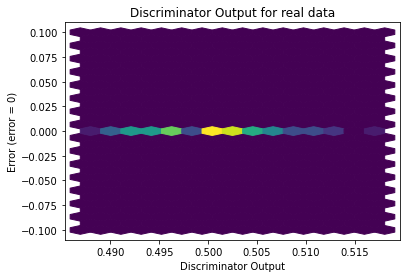

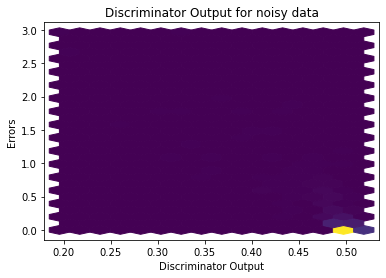

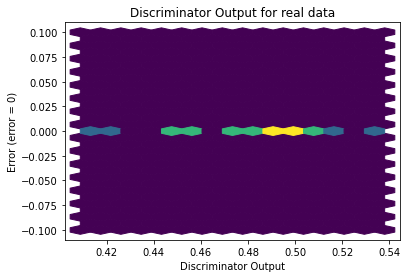

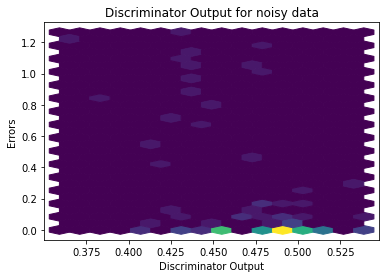

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


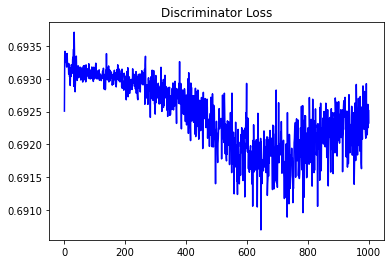

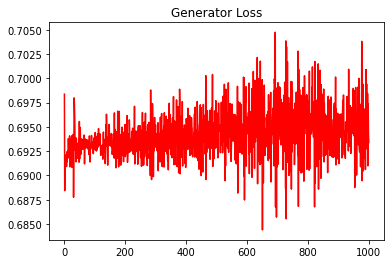

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07792100322672302


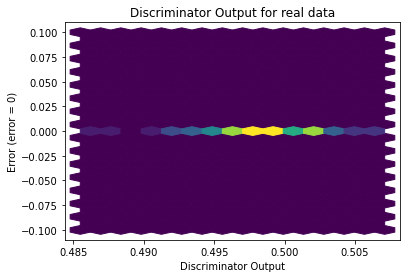

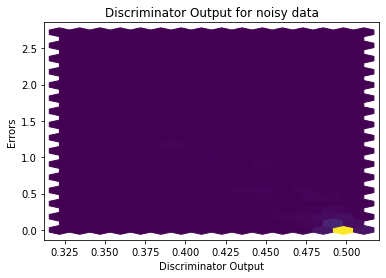

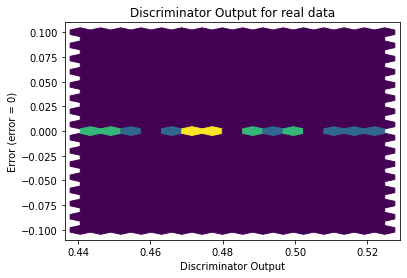

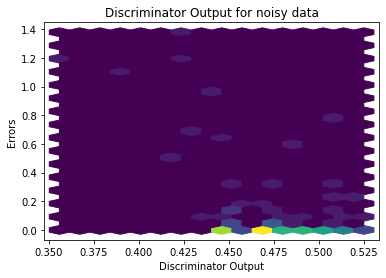

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1435]], device='cuda:0', requires_grad=True)
